<a href="https://colab.research.google.com/github/HarshBhatt123/A-Z-ML/blob/main/XG_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [3]:
print(X)

[[38 'Married' 'INR 20,001 to 30,000' ...
  'Often (once or twice in weekly trips)' 'Heavy traffic'
  'Co-driver takes over driving']
 [40 'Married' 'INR 20,001 to 30,000' ...
  'Often (once or twice in weekly trips)' 'Poor sleep'
  'Co-driver takes over driving']
 [39 'Single' 'INR 30,000 and above' ...
  'Sometimes (once or twice in a monthly trip)' 'Vehicle heat'
  'Co-driver takes over driving']
 ...
 [46 'Married' 'INR 10,001 to 20,000' ...
  'Sometimes (once or twice in a monthly trip)' 'Poor sleep'
  'Wash face and drink water']
 [42 'Married' 'INR 10,001 to 20,000' ...
  'Sometimes (once or twice in a monthly trip)' 'Poor sleep'
  'Wash face and drink water']
 [46 'Married' 'INR 10,001 to 20,000' ...
  'Sometimes (once or twice in a monthly trip)' 'Long driving time'
  'Smoke/chew tobacco or drug']]


In [4]:
print(y)

['2=Sometimes' '2=Sometimes' '4=Nearly all the time' '3=Very often'
 '3=Very often' '3=Very often' '1=Rarely' '3=Very often'
 '4=Nearly all the time' '3=Very often' '2=Sometimes' '3=Very often'
 '3=Very often' '3=Very often' '3=Very often' '3=Very often'
 '3=Very often' '2=Sometimes' '3=Very often' '2=Sometimes' '3=Very often'
 '3=Very often' '2=Sometimes' '3=Very often' '4=Nearly all the time'
 '2=Sometimes' '1=Rarely' '2=Sometimes' '2=Sometimes' '3=Very often'
 '1=Rarely' '2=Sometimes' '3=Very often' '2=Sometimes' '2=Sometimes'
 '3=Very often' '4=Nearly all the time' '3=Very often' '1=Rarely'
 '2=Sometimes' '3=Very often' '2=Sometimes' '3=Very often' '3=Very often'
 '2=Sometimes' '3=Very often' '0=Never' '2=Sometimes' '1=Rarely'
 '2=Sometimes' '1=Rarely' '2=Sometimes' '2=Sometimes' '1=Rarely'
 '3=Very often' '2=Sometimes' '2=Sometimes' '3=Very often' '2=Sometimes'
 '4=Nearly all the time' '2=Sometimes' '2=Sometimes' '2=Sometimes'
 '3=Very often' '4=Nearly all the time' '2=Sometimes'


## Taking care of Missing data


In [5]:
dataset.isnull().sum(axis=0)

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    1
X18    0
X19    0
X20    0
X21    1
X22    0
X23    0
X24    0
dtype: int64

In [6]:
for col in dataset.columns:

  dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [7]:
dataset.isnull().sum(axis=0)


Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
dtype: int64

In [8]:
for col in dataset.columns:
  print(col,"\n\n")
  print(dataset[col].value_counts())
  print("------------------------------")

Y 


3=Very often             41
2=Sometimes              32
1=Rarely                 15
4=Nearly all the time     8
0=Never                   4
Name: Y, dtype: int64
------------------------------
X1 


42    7
45    7
46    6
52    6
48    6
40    5
53    5
44    5
37    4
50    4
35    3
27    3
36    3
41    3
54    3
39    3
28    3
57    2
25    2
58    2
38    2
34    2
62    1
68    1
26    1
73    1
49    1
55    1
23    1
32    1
33    1
59    1
47    1
30    1
29    1
51    1
Name: X1, dtype: int64
------------------------------
X2 


Married    90
Single     10
Name: X2, dtype: int64
------------------------------
X3 


INR 20,001 to 30,000    51
INR 10,001 to 20,000    38
INR 30,000 and above     9
Up to INR 10,000         2
Name: X3, dtype: int64
------------------------------
X4 


Grade 9-10      29
Grade 5-8       28
Grade 11-12     17
Grade 1-5       13
Any degree      11
No schooling     2
Name: X4, dtype: int64
------------------------------
X5 


4    58
5    20
3 

In [9]:
def createMapping(col):
  j=0
  mapping_dict={}
  for i in list(dict(dataset[col].value_counts()).keys()):
    mapping_dict[i] = j
    j+=1
  return mapping_dict


categorical_column=["X2","X3","X4","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X20","X21","X22","X23","X24"]




In [10]:
for col in categorical_column:
  print({ col: createMapping(col) })
  dataset.replace({ col: createMapping(col) }, inplace=True)

{'X2': {'Married': 0, 'Single': 1}}
{'X3': {'INR 20,001 to 30,000': 0, 'INR 10,001 to 20,000': 1, 'INR 30,000 and above': 2, 'Up to INR 10,000': 3}}
{'X4': {'Grade 9-10': 0, 'Grade 5-8': 1, 'Grade 11-12': 2, 'Grade 1-5': 3, 'Any degree': 4, 'No schooling': 5}}
{'X7': {'31 or above': 0, '16-25': 1, '25-31': 2, '3-9': 3, '9-16': 4}}
{'X8': {'Employee': 0, 'Self-owned': 1, 'Contractor': 2}}
{'X9': {'3-5': 0, '6-10': 1, 'More than 10': 2, 'Upto 2': 3}}
{'X10': {'6-10': 0, '9-15': 1, 'More than 15': 2, '1-5': 3}}
{'X11': {'Food': 0, 'All goods/ parcel service': 1, 'Textile': 2, 'Construction': 3, 'Raw materials': 4, 'Gas': 5, 'Electrical': 6, 'Vehicular segments': 7}}
{'X12': {'1-4': 0, '4-5': 1, 'Above 6': 2, '5-6': 3, 'upto 1': 4}}
{'X13': {'Fuel stop': 0, 'Parking bays': 1, 'Hotel': 2, 'Toll plaza': 3}}
{'X14': {'Never': 0, 'Sometimes': 1, 'Always': 2}}
{'X15': {'On completion of work (on delivery)': 0, 'Fixed monthly salary (time based)': 1, 'On basis of Km driven (trip length)': 2}}
{'

In [11]:
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,2=Sometimes,38,0,0,1,5,7,0,0,1,...,0,2,0,2,3,1,0,2,1,3
1,2=Sometimes,40,0,0,0,5,15,3,0,2,...,0,2,0,0,5,0,0,2,0,3
2,4=Nearly all the time,39,1,2,2,1,13,0,0,2,...,0,2,0,2,6,1,0,0,2,3
3,3=Very often,59,0,0,1,4,20,0,0,1,...,0,2,0,1,6,0,0,0,1,3
4,3=Very often,37,0,0,4,6,19,0,0,1,...,0,2,1,2,8,0,0,0,4,3


In [12]:
dataset['Y']=dataset['Y'].replace(["0=Never", "1=Rarely",'2=Sometimes'],0)
dataset['Y']=dataset['Y'].replace([ '3=Very often', '4=Nearly all the time'],1)

In [13]:
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0,38,0,0,1,5,7,0,0,1,...,0,2,0,2,3,1,0,2,1,3
1,0,40,0,0,0,5,15,3,0,2,...,0,2,0,0,5,0,0,2,0,3
2,1,39,1,2,2,1,13,0,0,2,...,0,2,0,2,6,1,0,0,2,3
3,1,59,0,0,1,4,20,0,0,1,...,0,2,0,1,6,0,0,0,1,3
4,1,37,0,0,4,6,19,0,0,1,...,0,2,1,2,8,0,0,0,4,3


In [14]:
#dataset['Y'] = dataset['Y'].astype(str).str[:1].astype(int)

In [15]:
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0,38,0,0,1,5,7,0,0,1,...,0,2,0,2,3,1,0,2,1,3
1,0,40,0,0,0,5,15,3,0,2,...,0,2,0,0,5,0,0,2,0,3
2,1,39,1,2,2,1,13,0,0,2,...,0,2,0,2,6,1,0,0,2,3
3,1,59,0,0,1,4,20,0,0,1,...,0,2,0,1,6,0,0,0,1,3
4,1,37,0,0,4,6,19,0,0,1,...,0,2,1,2,8,0,0,0,4,3


In [16]:
dataset.dtypes

Y      int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
X24    int64
dtype: object

## Splitting the dataset into the Training set and Test set

In [17]:
x= dataset.iloc[:, 1:].values  
y= dataset.iloc[:, 0].values  

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

## Training XGBoost on the Training set

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# fit the model
model.fit(X_train, y_train)

XGBClassifier()

In [20]:
#  K-FOLD

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 52.86 %
Standard Deviation: 18.13 %


In [21]:

# evaluate performance
#yhat = model.predict(X_test)
#score = accuracy_score(y_test, yhat)
#print('Accuracy: %.3f' % score)

## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))	

[[ 6  9]
 [ 5 10]]
Accuracy: 0.533


### Hyp tuning parameters

In [23]:
#hyperpara default values

model = XGBClassifier(max_depth=6, 
                      subsample=1, colsample_bylevel=1, colsample_bytree=1, 
                      min_child_weight=1, reg_lambda=1, reg_alpha=0,
                      n_estimators=100, learning_rate=0.3 )
model.fit (X_train , y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict (X_train)
from sklearn.metrics import accuracy_score
print (' Train accuracy' ,accuracy_score (y_train, y_train_predict) )
print ('Test accuraCy',accuracy_score(y_test ,y_predict) )

 Train accuracy 1.0
Test accuraCy 0.6333333333333333


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.61      0.73      0.67        15

    accuracy                           0.63        30
   macro avg       0.64      0.63      0.63        30
weighted avg       0.64      0.63      0.63        30



In [25]:
accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))	
print('Precision: %.3f' % precision_score(y_test, y_predict))
print('Recall: %.3f' % recall_score(y_test, y_predict))
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

Accuracy: 0.633
Precision: 0.611
Recall: 0.733
F1 Score: 0.667


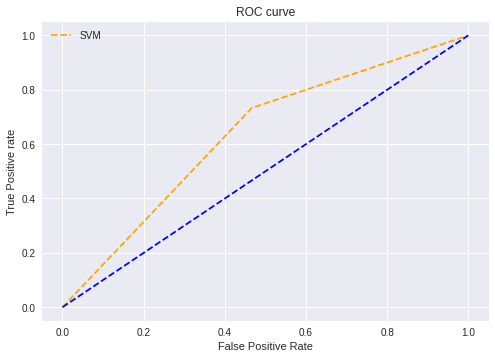

In [26]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict, pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_predict)
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

#print(auc_score1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [27]:
#hyperpara tuned values

model = XGBClassifier(max_depth=4, subsample=1,
                      n_estimators=150,learning_rate=0.1,  min_child_weight=2,
                      random_state=5)
model.fit (X_train , y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict (X_train)
from sklearn.metrics import accuracy_score
print (' Train accuracy' ,accuracy_score (y_train, y_train_predict) )
print ('Test accuraCy',accuracy_score(y_test ,y_predict) )

 Train accuracy 1.0
Test accuraCy 0.6666666666666666


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.63      0.80      0.71        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30



In [29]:
accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))	
print('Precision: %.3f' % precision_score(y_test, y_predict))
print('Recall: %.3f' % recall_score(y_test, y_predict))
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

Accuracy: 0.667
Precision: 0.632
Recall: 0.800
F1 Score: 0.706


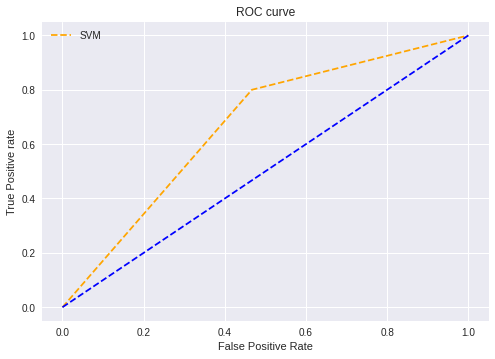

In [30]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict, pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_predict)
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

#print(auc_score1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Performance metrics ( accuracy, precision,recall,F1score, send,spec,area under ROC curve)

In [31]:
accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))	
print('Precision: %.3f' % precision_score(y_test, y_predict))
print('Recall: %.3f' % recall_score(y_test, y_predict))
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

Accuracy: 0.667
Precision: 0.632
Recall: 0.800
F1 Score: 0.706


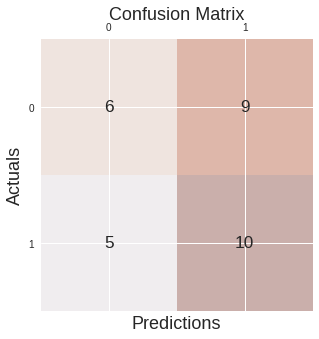

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [33]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))	
print('Precision: %.3f' % precision_score(y_test, y_predict))
print('Recall: %.3f' % recall_score(y_test, y_predict))
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

Accuracy: 0.667
Precision: 0.632
Recall: 0.800
F1 Score: 0.706


Variable importance plot 

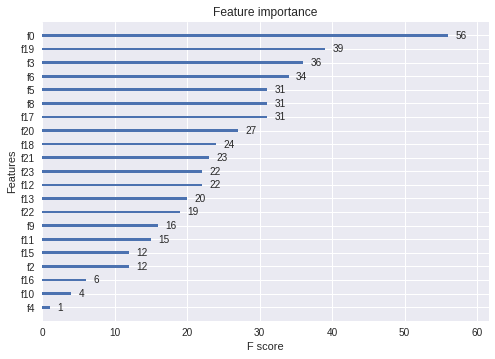

In [34]:
# plot feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [35]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict, pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [36]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_predict)
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1)

0.6666666666666666


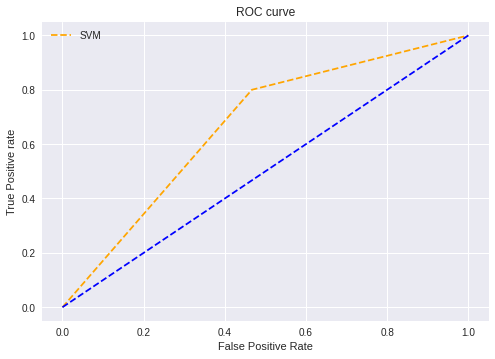

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [38]:
#Feature Selection with XGBoost Feature Importance Scores
from sklearn.feature_selection import SelectFromModel
from numpy import loadtxt
from numpy import sort
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=24, Accuracy: 53.33%
Thresh=0.000, n=24, Accuracy: 53.33%
Thresh=0.000, n=24, Accuracy: 53.33%
Thresh=0.018, n=21, Accuracy: 53.33%
Thresh=0.020, n=20, Accuracy: 53.33%
Thresh=0.028, n=19, Accuracy: 53.33%
Thresh=0.032, n=18, Accuracy: 53.33%
Thresh=0.035, n=17, Accuracy: 53.33%
Thresh=0.036, n=16, Accuracy: 53.33%
Thresh=0.038, n=15, Accuracy: 53.33%
Thresh=0.038, n=14, Accuracy: 60.00%
Thresh=0.039, n=13, Accuracy: 56.67%
Thresh=0.039, n=12, Accuracy: 60.00%
Thresh=0.039, n=11, Accuracy: 50.00%
Thresh=0.043, n=10, Accuracy: 50.00%
Thresh=0.048, n=9, Accuracy: 46.67%
Thresh=0.049, n=8, Accuracy: 43.33%
Thresh=0.057, n=7, Accuracy: 46.67%
Thresh=0.060, n=6, Accuracy: 43.33%
Thresh=0.064, n=5, Accuracy: 43.33%
Thresh=0.065, n=4, Accuracy: 43.33%
Thresh=0.073, n=3, Accuracy: 53.33%
Thresh=0.084, n=2, Accuracy: 43.33%
Thresh=0.094, n=1, Accuracy: 53.33%


In [39]:
# retrieve performance metrics
#results = classifier.evals_result()

In [40]:
# plot learning curves
#plt.plot(results['validation_0']['logloss'], label='train')
#plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
#plt.legend()
# show the plot
#plt.show()

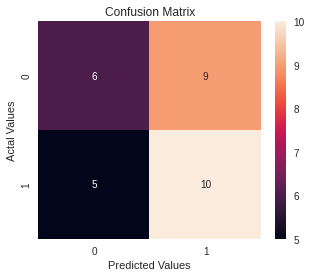

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = [0,1],
                     columns = [0,1])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Applying k-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 51.43 %
Standard Deviation: 24.91 %


In [43]:
from sklearn.model_selection import RepeatedKFold
cv    = RepeatedKFold(n_splits=5, n_repeats=100, random_state=101)
folds = [(train,test) for train, test in cv.split(X_train, y_train)]

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
metrics = ['auc', 'fpr', 'tpr', 'thresholds']
results = {
    'train': {m:[] for m in metrics},
    'val'  : {m:[] for m in metrics},
    'test' : {m:[] for m in metrics}
}

params = {
    'objective'   : 'binary:logistic',
    'eval_metric' : 'logloss'
}